In [3]:
import numpy as np;
import csv;
from matplotlib import pyplot as plt;
from matplotlib import animation;

In [49]:
def read_csv_qvt(fname):
    q = []
    v = []
    t = []

    dim = 3


    with open(fname, mode="r") as csv_file:
        csv_reader = csv.DictReader(csv_file)

        cols = len(csv_reader.fieldnames)

        pcount = (cols - 1) // (2 * dim)

        for i in range(pcount):
            q.append([])
            v.append([])

        for row in csv_reader:
            t.append(float(row["t"]))

            for i in range(pcount):
                q[i].append([float(row[f"X{i}"]), float(row[f"Y{i}"]), float(row[f"Z{i}"])])
                v[i].append([float(row[f"X'{i}"]), float(row[f"Y'{i}"]), float(row[f"Z'{i}"])])

    return (q,v,t)


In [132]:
qvt = read_csv_qvt("pendulum3.csv")
q = qvt[0]
v = qvt[1]
t = qvt[2]
pn = len(q)

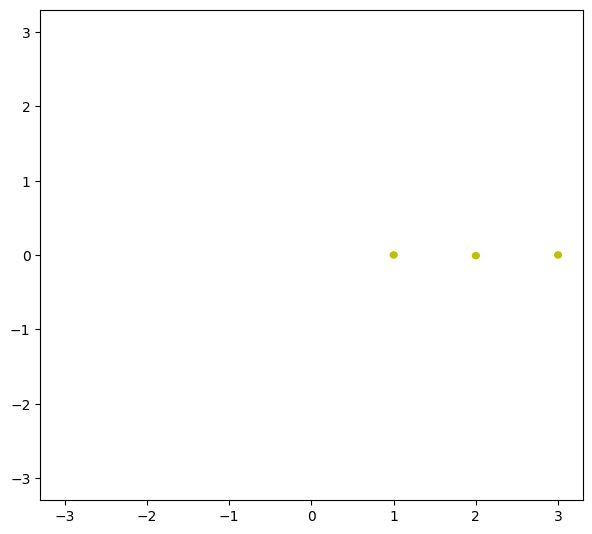

In [133]:
XLIM = (-3.3,3.3)
YLIM = (-3.3,3.3)
CIRCLER = 0.05


fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=XLIM, ylim=YLIM)

particles = [plt.Circle((q[n][0][0], q[n][0][1]), CIRCLER, fc='y') for n in range(pn)]


interval = (t[1] - t[0]) * 1000
frames = len(t)

def init():
    for n,p in enumerate(particles):
        p.center = (q[n][0][0], q[n][0][1])
        ax.add_patch(p)
    return particles

frame = 0

def animate(i):
    global frame,particles

    for n,p in enumerate(particles):
        x = q[n][frame][0]
        y = q[n][frame][1]
        p.center = (x, y)
#
    frame += 1
    return particles[0],

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=frames, 
                               interval=interval,
                               blit=True
                               )
plt.show()


In [134]:
anim.save('pendulum3.mp4', fps=30, 
          extra_args=['-vcodec', 'h264',
                      '-pix_fmt', 'yuv420p'])